# Addition

You can add one network to another. The network you're adding the other network too will be updated with the nodes, link and data from the other network. The process aims to consolidate node and link indexing, for nodes in the same spot and links with the same modes.

This method should only be used with networks that have been generated in the same manner, so two PT2MATSim networks or two GeNet OSM networks, both of which either simplified or not. It is recommended that they are not simplified at the time of adding, as some nodes may have ceased to exist through simplification, possibly leading to a network with weird behaviour, duplicated links (especially when the networks have different density) or connectivity issues.

For now, the method only supports non overlapping services for `Schedules`, so let's merge two `Network`s with just graphs.

Below we make two networks from OSM. One a small, but denser subset of the other and add them together.

In [1]:
from genet import read_osm

_n_tiny = read_osm('../example_data/tiny_example.osm', 
             '../genet/configs/OSM/default_config.yml',
            epsg='epsg:27700')
_n_tiny

2021-04-13 19:08:58,757 - Building OSM graph from file ../example_data/tiny_example.osm
2021-04-13 19:08:58,822 - Creating networkx graph from OSM data
2021-04-13 19:08:58,823 - OSM: Extract Nodes and Paths from OSM data
2021-04-13 19:08:58,843 - OSM: Add each OSM way (aka, path) to the OSM graph
2021-04-13 19:08:58,844 - Created OSM edges
2021-04-13 19:08:59,265 - Added 810 nodes
2021-04-13 19:09:02,192 - Generated 275 link ids.
2021-04-13 19:09:02,343 - Added 275 links
2021-04-13 19:09:02,344 - Deleting isolated nodes which have no edges.
2021-04-13 19:09:02,364 - Removed 634 nodes.


<Network instance at 4397944280: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 176
Number of edges: 275
Average in degree:   1.5625
Average out degree:   1.5625 and 
schedule Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated a

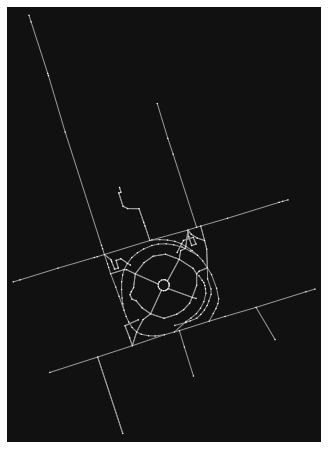

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11438c9e8>)

In [2]:
_n_tiny.plot()

In [3]:
_n = read_osm('../example_data/example.osm', 
             '../genet/configs/OSM/slim_config.yml',
            epsg='epsg:27700')
_n

2021-04-13 19:09:03,023 - Building OSM graph from file ../example_data/example.osm
2021-04-13 19:09:03,499 - Creating networkx graph from OSM data
2021-04-13 19:09:03,500 - OSM: Extract Nodes and Paths from OSM data
2021-04-13 19:09:03,689 - OSM: Add each OSM way (aka, path) to the OSM graph
2021-04-13 19:09:03,690 - Created OSM edges
2021-04-13 19:09:05,513 - Added 8695 nodes
2021-04-13 19:09:10,730 - Generated 802 link ids.
2021-04-13 19:09:11,115 - Added 802 links
2021-04-13 19:09:11,117 - Deleting isolated nodes which have no edges.
2021-04-13 19:09:11,299 - Removed 8132 nodes.


<Network instance at 4623241288: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 563
Number of edges: 802
Average in degree:   1.4245
Average out degree:   1.4245 and 
schedule Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


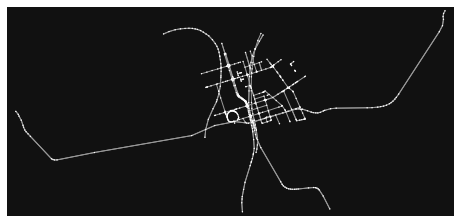

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11451cc50>)

In [4]:
_n.plot()

The `add` method actually adds one `Network` onto another, rather than create a new instance to save some memory. The `Network` being added will inherit or change link or node ids depending on the `Network` it's being added to.

In [5]:
_n.add(_n_tiny)

2021-04-13 19:09:11,633 - Generated node id 7195968685.
2021-04-13 19:09:11,640 - Changed Link attributes for 1 links
2021-04-13 19:09:11,643 - Changed Link attributes for 0 links
2021-04-13 19:09:11,657 - Changed Node attributes under index: 101998
2021-04-13 19:09:11,660 - Changed Node index from 101998 to 7195968685
2021-04-13 19:09:11,662 - Generated node id 7195968686.
2021-04-13 19:09:11,673 - Changed Link attributes for 2 links
2021-04-13 19:09:11,678 - Changed Link attributes for 2 links
2021-04-13 19:09:11,691 - Changed Node attributes under index: 1684410096
2021-04-13 19:09:11,696 - Changed Node index from 1684410096 to 7195968686
/Users/kasia.kozlowska/PycharmProjects/ABM/genet/genet/utils/graph_operations.py:344: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for idx in s2_id_df.dropna()[s2_id_df['right'] != s2_id_df['left']].index]
2021-04-13 19:09:11,707 - Finished consolidating node indexing between the two graphs
2021-04-13 19:09:19,481 -

2021-04-13 19:09:20,356 - Generated link id 834.
2021-04-13 19:09:20,369 - Changed Link attributes under index: 111
2021-04-13 19:09:20,370 - Changed Link index from 111 to 834
2021-04-13 19:09:20,372 - Generated 1 link ids.
2021-04-13 19:09:20,373 - Generated link id 835.
2021-04-13 19:09:20,385 - Changed Link attributes under index: 119
2021-04-13 19:09:20,385 - Changed Link index from 119 to 835
2021-04-13 19:09:20,388 - Generated 1 link ids.
2021-04-13 19:09:20,389 - Generated link id 836.
2021-04-13 19:09:20,402 - Changed Link attributes under index: 167
2021-04-13 19:09:20,404 - Changed Link index from 167 to 836
2021-04-13 19:09:20,405 - Generated 1 link ids.
2021-04-13 19:09:20,406 - Generated link id 837.
2021-04-13 19:09:20,418 - Changed Link attributes under index: 194
2021-04-13 19:09:20,419 - Changed Link index from 194 to 837
2021-04-13 19:09:20,421 - Generated 1 link ids.
2021-04-13 19:09:20,421 - Generated link id 838.
2021-04-13 19:09:20,433 - Changed Link attributes u

2021-04-13 19:09:20,982 - Changed Link index from 193 to 870
2021-04-13 19:09:20,983 - Generated 1 link ids.
2021-04-13 19:09:20,986 - Generated link id 871.
2021-04-13 19:09:20,998 - Changed Link attributes under index: 151
2021-04-13 19:09:20,999 - Changed Link index from 151 to 871
2021-04-13 19:09:21,002 - Generated 1 link ids.
2021-04-13 19:09:21,002 - Generated link id 872.
2021-04-13 19:09:21,014 - Changed Link attributes under index: 135
2021-04-13 19:09:21,015 - Changed Link index from 135 to 872
2021-04-13 19:09:21,017 - Generated 1 link ids.
2021-04-13 19:09:21,019 - Generated link id 873.
2021-04-13 19:09:21,031 - Changed Link attributes under index: 45
2021-04-13 19:09:21,032 - Changed Link index from 45 to 873
2021-04-13 19:09:21,033 - Generated 1 link ids.
2021-04-13 19:09:21,034 - Generated link id 874.
2021-04-13 19:09:21,046 - Changed Link attributes under index: 93
2021-04-13 19:09:21,047 - Changed Link index from 93 to 874
2021-04-13 19:09:21,049 - Generated 1 link 

2021-04-13 19:09:21,635 - Changed Link attributes under index: 78
2021-04-13 19:09:21,635 - Changed Link index from 78 to 907
2021-04-13 19:09:21,637 - Generated 1 link ids.
2021-04-13 19:09:21,638 - Generated link id 908.
2021-04-13 19:09:21,649 - Changed Link attributes under index: 4
2021-04-13 19:09:21,650 - Changed Link index from 4 to 908
2021-04-13 19:09:21,652 - Generated 1 link ids.
2021-04-13 19:09:21,653 - Generated link id 909.
2021-04-13 19:09:21,665 - Changed Link attributes under index: 157
2021-04-13 19:09:21,666 - Changed Link index from 157 to 909
2021-04-13 19:09:21,667 - Generated 1 link ids.
2021-04-13 19:09:21,669 - Generated link id 910.
2021-04-13 19:09:21,680 - Changed Link attributes under index: 46
2021-04-13 19:09:21,681 - Changed Link index from 46 to 910
2021-04-13 19:09:21,683 - Generated 1 link ids.
2021-04-13 19:09:21,684 - Generated link id 911.
2021-04-13 19:09:21,694 - Changed Link attributes under index: 134
2021-04-13 19:09:21,695 - Changed Link in

2021-04-13 19:09:22,269 - Generated link id 944.
2021-04-13 19:09:22,279 - Changed Link attributes under index: 206
2021-04-13 19:09:22,280 - Changed Link index from 206 to 944
2021-04-13 19:09:22,284 - Generated 1 link ids.
2021-04-13 19:09:22,284 - Generated link id 945.
2021-04-13 19:09:22,297 - Changed Link attributes under index: 219
2021-04-13 19:09:22,298 - Changed Link index from 219 to 945
2021-04-13 19:09:22,299 - Generated 1 link ids.
2021-04-13 19:09:22,300 - Generated link id 946.
2021-04-13 19:09:22,311 - Changed Link attributes under index: 74
2021-04-13 19:09:22,312 - Changed Link index from 74 to 946
2021-04-13 19:09:22,316 - Generated 1 link ids.
2021-04-13 19:09:22,317 - Generated link id 947.
2021-04-13 19:09:22,333 - Changed Link attributes under index: 232
2021-04-13 19:09:22,333 - Changed Link index from 232 to 947
2021-04-13 19:09:22,336 - Generated 1 link ids.
2021-04-13 19:09:22,337 - Generated link id 948.
2021-04-13 19:09:22,349 - Changed Link attributes und

2021-04-13 19:09:22,925 - Generated 1 link ids.
2021-04-13 19:09:22,925 - Generated link id 981.
2021-04-13 19:09:22,938 - Changed Link attributes under index: 73
2021-04-13 19:09:22,939 - Changed Link index from 73 to 981
2021-04-13 19:09:22,940 - Generated 1 link ids.
2021-04-13 19:09:22,941 - Generated link id 982.
2021-04-13 19:09:22,953 - Changed Link attributes under index: 131
2021-04-13 19:09:22,954 - Changed Link index from 131 to 982
2021-04-13 19:09:22,956 - Generated 1 link ids.
2021-04-13 19:09:22,957 - Generated link id 983.
2021-04-13 19:09:22,970 - Changed Link attributes under index: 29
2021-04-13 19:09:22,971 - Changed Link index from 29 to 983
2021-04-13 19:09:22,972 - Generated 1 link ids.
2021-04-13 19:09:22,974 - Generated link id 984.
2021-04-13 19:09:22,986 - Changed Link attributes under index: 189
2021-04-13 19:09:22,986 - Changed Link index from 189 to 984
2021-04-13 19:09:22,989 - Generated 1 link ids.
2021-04-13 19:09:22,990 - Generated link id 985.
2021-04

In [6]:
_n

<Network instance at 4623241288: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 665
Number of edges: 1003
Average in degree:   1.5083
Average out degree:   1.5083 and 
schedule Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


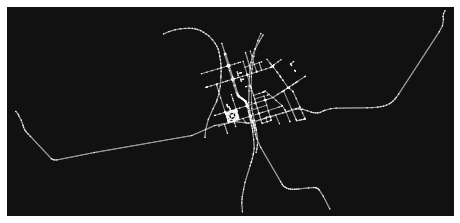

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1056c8128>)

In [7]:
_n.plot()